# Capstone Project - The Battle of the Neighborhoods


## Are you planning to open a new Indian Restaurant in New York City (NYC) area?


## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

The client wants to open an Indian restaurant in this one of the world’s most diverse region. No single restaurant is ever going to appeal to everyone. Some people like quiet, intimate settings; others prefer boisterous ones. Some people want to bring their kids along; others want to dine alone. The preferences are as varied as the possible offerings, with specific generational cohorts preferring one thing, “people who like Indian food” preferring another and everyone else liking a million other things in between.

So, what are all the factors we must consider determining which neighborhood will have best potential to open an Indian restaurant?

Population, Competition in the neighborhood, Surrounding amenities like parks, visiting sites, entertainment, Market Places, Menu items and so on…Our solution needs to be data driven for avoiding or considering low risk criteria and high success rate and thus applying data science techniques and methodologies would lead us to take correct decision.

## Data <a name="data"></a>

We will be analyzing data and provide insight as per below to the client to determine which neighbourhood in New York City will be best choice to start a restaurant.

*	NYC Population & Demographic characteristics

Data sources:

Population – https://en.wikipedia.org/wiki/New_York_City

Demographic Characteristics - https://en.wikipedia.org/wiki/Demographics_of_New_York_City

Web scraping techniques was used to get NYC's population density and demographics data from Wikipedia. Preliminary finding indicates that Queens being the second most populous urban area in New York City (NYC), behind Brooklyn; and the most ethnically diverse urban area in NYC with the highest Asian ethnic minority population.

*	Who are the competitors in that location?

Data source:
https://cocl.us/new_york_dataset 

New York City data that contains Borough, Neighborhoods along with their latitudes and longitudes. These datasets will be used to explore various neighborhoods and each Indian restaurants venue in the neighborhood

Data Source:
**Foursquare API**

By using this API we will get all the venues in the neighborhoods. The data going to be collected/acquired from the Foursquare API about the various restaurants in each neighborhood of New York city especially Indian cuisine, which will be used for acquiring the information regarding same for all the venues of each neighborhood.


### Neighborhood Candidates

We are going to find the candidate neighborhoods along with their latitude & longitude coordinates. We will also get a list of top 100 venues within a radius of 1000 metres for a given latitude and longitude based on tip & rating.

Let's import all required libraries and preapre the environment for modeling and analysis.

In [1]:
# Preparing environment

import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
!conda install -c conda-forge folium

import os
import folium # map rendering library
# Matplotlib and associated plotting modules

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mp
import re
import csv
%matplotlib inline


print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    folium-0.11.0              |             py_0          61 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    branca:          0.4.1-py_0        conda-forge
    folium:          

Let's prepare New York City (NYC) population and demographic data which would be helpful analyzing and identifying best neighborhood as one of the important factor.

In [2]:
response_obj = requests.get('https://en.wikipedia.org/wiki/New_York_City').text
soup = BeautifulSoup(response_obj,'lxml')
Neighborhoods_NYC_Table = soup.find('table', {'class':'wikitable sortable'})

In [3]:
rows = Neighborhoods_NYC_Table.select("tbody > tr")[3:8]

boroughs = []
for row in rows:
    borough = {}
    tds = row.select('td')
    borough["borough"] = tds[0].text.strip()
    borough["county"] = tds[1].text.strip()
    borough["population"] = float(tds[2].text.strip().replace(",",""))
    borough["gdp_billions"] = float(tds[3].text.strip().replace(",",""))
    borough["gdp_per_capita"] = float(tds[4].text.strip().replace(",",""))
    borough["land_sqm"] = float(tds[5].text.strip().replace(",",""))
    borough["land_sqkm"] = float(tds[6].text.strip().replace(",",""))
    borough["persons_sqm"] = float(tds[7].text.strip().replace(",",""))
    borough["persons_sqkm"] = float(tds[8].text.strip().replace(",",""))
    
    boroughs.append(borough)

print(boroughs)

[{'borough': 'The Bronx', 'county': 'Bronx', 'population': 1418207.0, 'gdp_billions': 42.695, 'gdp_per_capita': 30100.0, 'land_sqm': 42.1, 'land_sqkm': 109.04, 'persons_sqm': 33867.0, 'persons_sqkm': 13006.0}, {'borough': 'Brooklyn', 'county': 'Kings', 'population': 2559903.0, 'gdp_billions': 91.559, 'gdp_per_capita': 35800.0, 'land_sqm': 70.82, 'land_sqkm': 183.42, 'persons_sqm': 36147.0, 'persons_sqkm': 13957.0}, {'borough': 'Manhattan', 'county': 'New York', 'population': 1628706.0, 'gdp_billions': 600.244, 'gdp_per_capita': 368500.0, 'land_sqm': 22.83, 'land_sqkm': 59.13, 'persons_sqm': 71341.0, 'persons_sqkm': 27544.0}, {'borough': 'Queens', 'county': 'Queens', 'population': 2253858.0, 'gdp_billions': 93.31, 'gdp_per_capita': 41400.0, 'land_sqm': 108.53, 'land_sqkm': 281.09, 'persons_sqm': 20767.0, 'persons_sqkm': 8018.0}, {'borough': 'Staten Island', 'county': 'Richmond', 'population': 476143.0, 'gdp_billions': 14.514, 'gdp_per_capita': 30500.0, 'land_sqm': 58.37, 'land_sqkm': 15

In [4]:
response_obj = requests.get('https://en.wikipedia.org/wiki/Demographics_of_New_York_City').text
soup = BeautifulSoup(response_obj,'lxml')
Population_Census_Table = soup.select_one('.wikitable:nth-of-type(5)') #use css selector to target correct table.

jurisdictions = []
rows = Population_Census_Table.select("tbody > tr")[3:8]
for row in rows:
    jurisdiction = {}
    tds = row.select('td')
    jurisdiction["jurisdiction"] = tds[0].text.strip()
    jurisdiction["population_census"] = tds[1].text.strip()
    jurisdiction["%_white"] = float(tds[2].text.strip().replace(",",""))
    jurisdiction["%_black_or_african_amercian"] = float(tds[3].text.strip().replace(",",""))
    jurisdiction["%_Asian"] = float(tds[4].text.strip().replace(",",""))
    jurisdiction["%_other"] = float(tds[5].text.strip().replace(",",""))
    jurisdiction["%_mixed_race"] = float(tds[6].text.strip().replace(",",""))
    jurisdiction["%_hispanic_latino_of_other_race"] = float(tds[7].text.strip().replace(",",""))
    jurisdiction["%_catholic"] = float(tds[10].text.strip().replace(",",""))
    jurisdiction["%_jewish"] = float(tds[12].text.strip().replace(",",""))
    jurisdictions.append(jurisdiction)

print(jurisdictions)

[{'jurisdiction': 'Queens', 'population_census': '2,229,379', '%_white': 44.1, '%_black_or_african_amercian': 20.0, '%_Asian': 17.6, '%_other': 12.3, '%_mixed_race': 6.1, '%_hispanic_latino_of_other_race': 25.0, '%_catholic': 37.0, '%_jewish': 5.0}, {'jurisdiction': 'Manhattan', 'population_census': '1,537,195', '%_white': 54.4, '%_black_or_african_amercian': 17.4, '%_Asian': 9.4, '%_other': 14.7, '%_mixed_race': 4.1, '%_hispanic_latino_of_other_race': 27.2, '%_catholic': 11.0, '%_jewish': 9.0}, {'jurisdiction': 'Bronx', 'population_census': '1,332,650', '%_white': 29.9, '%_black_or_african_amercian': 35.6, '%_Asian': 3.0, '%_other': 25.7, '%_mixed_race': 5.8, '%_hispanic_latino_of_other_race': 48.4, '%_catholic': 14.0, '%_jewish': 5.0}, {'jurisdiction': 'Staten Island', 'population_census': '443,728', '%_white': 77.6, '%_black_or_african_amercian': 9.7, '%_Asian': 5.7, '%_other': 4.3, '%_mixed_race': 2.7, '%_hispanic_latino_of_other_race': 12.1, '%_catholic': 11.0, '%_jewish': 5.0}, {

In [5]:
df = pd.DataFrame(jurisdictions, columns=["jurisdiction","%_white", "%_black_or_african_amercian", "%_Asian", "%_other", "%_mixed_race", "%_hispanic_latino_of_other_race"])
df.head()

,jurisdiction,%_white,%_black_or_african_amercian,%_Asian,%_other,%_mixed_race,%_hispanic_latino_of_other_race
0,Queens,44.1,20.0,17.6,12.3,6.1,25.0
1,Manhattan,54.4,17.4,9.4,14.7,4.1,27.2
2,Bronx,29.9,35.6,3.0,25.7,5.8,48.4
3,Staten Island,77.6,9.7,5.7,4.3,2.7,12.1
4,NYC Total,44.7,26.6,9.8,14.0,4.9,27.0


Preliminary finding indicates that:

Queens is the most populous urban area in New York City (NYC). It is also the most ethnically diverse urban area in NYC with the highest Asian ethnic minority population.

Despite the fact that Manhattan is the second most populous urban area in New York City (NYC), it has a population density of 27,826 people per square km, making it highest of any borough in the United States. It has the second highest Asian ethnic minority population in NYC.

Now let's find neighborhoods using FourSquare API & New York City data that contains list Boroughs, Neighbourhoods along with their latitude and longitude.

In [6]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    locatidn = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

Let's define a function to intract with FourSquare API and get top 100 venues within a radius of 1000 metres for a given latitude and longitude.

In [7]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    CLIENT_ID = 'Your Client ID'# Foursquare ID, note there is a daily call quota limit 
    CLIENT_SECRET ='Your Client Secret' # Foursquare Secret, note there is a daily call quota it
    VERSION = 'Version' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

Now we are going to define a function to get venue details like like count , rating , tip counts for a given venue ID to be used for ranking.

In [8]:
def get_venue_details(venue_id):
        
    CLIENT_ID = '0DGA0Q4ZLZXNJFSD2JBGQGM1FX4C54ESU1HEX1LNM5HCYDDJ'# Foursquare ID, note there is a daily call quota limit 
    CLIENT_SECRET ='FOLPLJY0FEFSLOYMOYEOOOAGMGGDLVBQ1LG0CP4FWNTBT5MD' # Foursquare Secret, note there is a daily call quota it it
    VERSION = '20200717' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

Let's also define a funtion to get the New York city (NYC) data such as Boroughs and Neighborhoods along with their latitude and longitude.

In [9]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

In [10]:
# get new york data
new_york_data=get_new_york_data()
new_york_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [11]:
new_york_data.shape

(306, 4)

We could see that based on the dataset, there are a total of **306 different Neighborhoods** in New York City (NYC) which can be explored to open the restaurant.

Now let's find most populated Bororoughs based on total number of Neighborhoods in New York City (NYC). We will be using a plot to visualize the data which would give us quick insight.

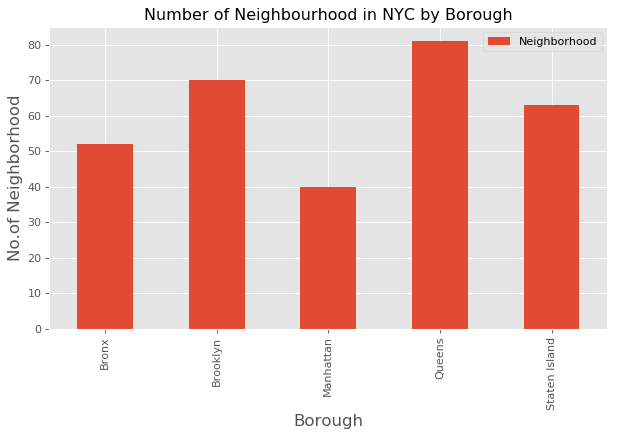

In [12]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(9,5), dpi = 80)
# title
plt.title('Number of Neighbourhood in NYC by Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
new_york_data.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
plt.show()


We could see based on above data that Queens is the most densely populated borough in New York City (NYC) with more than 80 neighborhoods followed by Brooklyn, Staten Island, Bronx and Manhattan.

Now let's focus on the Boroughs and Neighborhoods which contains Indian restaurants as the client wants to explore opportunity to open Indian restaurant.

In [13]:
# prepare neighborhood list that contains indian restaurant
column_names=['Borough', 'Neighborhood', 'ID','Name']
indian_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in new_york_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    indian_resturants=venues[venues['Category']=='Indian Restaurant']   
    print('(',count,'/',len(new_york_data),')','Indian Resturants in '+Neighborhood+', '+Borough+':'+str(len(indian_resturants)))
    for resturant_detail in indian_resturants.values.tolist():
        id, name , category=resturant_detail
        indian_rest_ny = indian_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Indian Resturants in Wakefield, Bronx:0
( 2 / 306 ) Indian Resturants in Co-op City, Bronx:0
( 3 / 306 ) Indian Resturants in Eastchester, Bronx:0
( 4 / 306 ) Indian Resturants in Fieldston, Bronx:0
( 5 / 306 ) Indian Resturants in Riverdale, Bronx:0
( 6 / 306 ) Indian Resturants in Kingsbridge, Bronx:0
( 7 / 306 ) Indian Resturants in Marble Hill, Manhattan:0
( 8 / 306 ) Indian Resturants in Woodlawn, Bronx:1
( 9 / 306 ) Indian Resturants in Norwood, Bronx:0
( 10 / 306 ) Indian Resturants in Williamsbridge, Bronx:1
( 11 / 306 ) Indian Resturants in Baychester, Bronx:0
( 12 / 306 ) Indian Resturants in Pelham Parkway, Bronx:0
( 13 / 306 ) Indian Resturants in City Island, Bronx:0
( 14 / 306 ) Indian Resturants in Bedford Park, Bronx:0
( 15 / 306 ) Indian Resturants in University Heights, Bronx:0
( 16 / 306 ) Indian Resturants in Morris Heights, Bronx:0
( 17 / 306 ) Indian Resturants in Fordham, Bronx:0
( 18 / 306 ) Indian Resturants in East Tremont, Bronx:0
( 19 / 306 ) Ind

In [14]:
indian_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot
1,Bronx,Williamsbridge,570c3a3fcd10eecd0d0434cd,Agra Grill
2,Bronx,Parkchester,4c194631838020a13e78e561,Melanies Roti Bar And Grill
3,Bronx,Spuyten Duyvil,4c04544df423a593ac83d116,Cumin Indian Cuisine
4,Bronx,Concourse,551b7f75498e86c00a0ed2e1,Hungry Bird


In [15]:
indian_rest_ny.shape

(138, 4)

Based on the above data we chould see that there are total **138 different neighborhoods** out of 306 total neighborhoods **in New York City (NYC) which currently contains Indian restaurant.**

Now let's find out which Bororoughs has most number of Indian restaurants in the Neighborhoods of New York City (NYC). We will be using a plot to visualize the data which would give us quick insight.

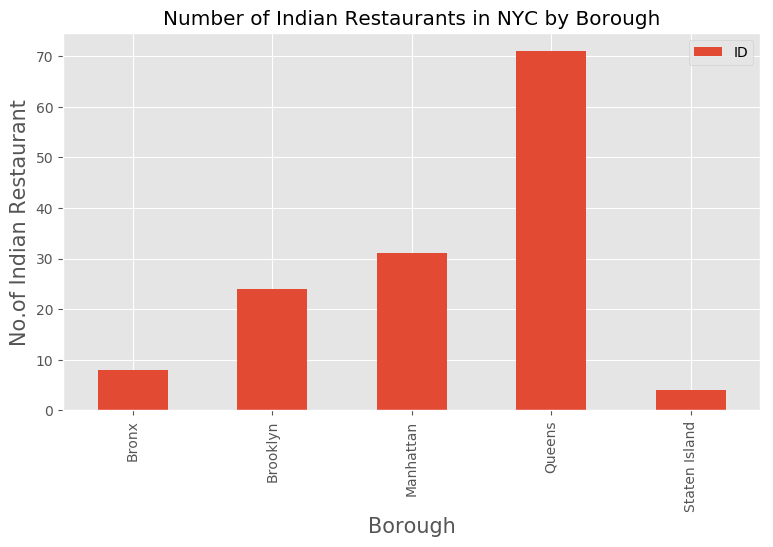

In [16]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Indian Restaurants in NYC by Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Restaurant', fontsize=15)
#giving a bar plot
indian_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

Note that **Queens has the highest number of Indian Restaurants with more than 70 restaurants** followed by Manhattan, Brooklyn, Bronx and Staten Island.

So now we have all the details of Indian restaurants in New York City (NYC) area. We also know which restaurants exactly are in vicinity of every neighborhood candidate center.

This concludes the data gathering phase - we're now ready to use this data for analysis to produce the report on optimal locations for a new Indian restaurant!


## Methodology <a name="methodology"></a>

In this project we will be detecting areas of New York City (NYC) that have low restaurant density, particularly those with low number of Indian restaurants.

We have collected the required location data to get details of boroughs and neighborhoods along with lattitude and longitude. We have also identified Indian restaurents (according to Foursquare categorization) by those boroughs and neighborhoods.

Next step in our analysis will be calculation and exploration of restaurant density across different areas of New York City (NYC) along with total population across different areas.

In the final step we will focus on most promising areas. We will take into consideration locations with fewer Indian restaurants, high population density and explore data based on Tips, Likes and Ratings. We will present map of all such locations and search for optimal venue location.

## Analysis <a name="analysis"></a>

Let's perform some basic explanatory data analysis and derive some additional info from our raw data. 

Let's pick one neighborhood of Queens borogh and try to get the list of Indian restaurant to get the details. We will check for Floral Park an as e.g.

In [17]:
indian_rest_ny[indian_rest_ny['Neighborhood']=='Floral Park']

,Borough,Neighborhood,ID,Name
101,Queens,Floral Park,527ffc0811d2d329d5e49abd,Jackson Diner
102,Queens,Floral Park,4e4e3e22bd4101d0d7a5c2d1,Kerala Kitchen
103,Queens,Floral Park,4b647b56f964a520c4b62ae3,Usha Foods & Usha Sweets
104,Queens,Floral Park,4b787c49f964a5209cd12ee3,Santoor Indian Restaurant
105,Queens,Floral Park,4c0c01e0bbc676b00d6b4cd5,Mumbai Xpress
106,Queens,Floral Park,4c76ff35a5676dcb72671721,Flavor Of India
107,Queens,Floral Park,55d68c1b498ecf05fa196fe1,Namaste Restaurant and Cafe
108,Queens,Floral Park,4df0f39dd4c04d0392c853ea,Sagar Chinese
109,Queens,Floral Park,4e6bfe1c7d8b2c711b17bbe5,Surya sweets and snacks


We are going to plot a graph to identify which neighborhood has most number of Indian restaurants in Queens borough.

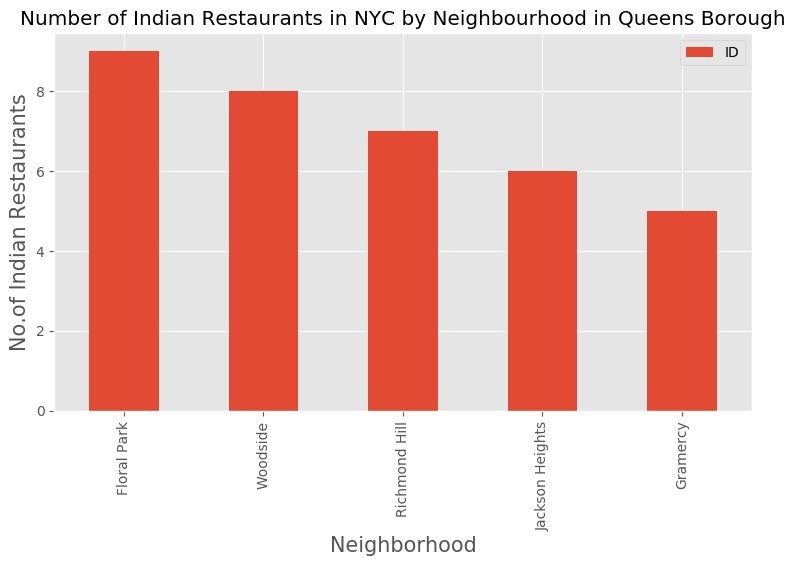

In [18]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Indian Restaurants in NYC by Neighbourhood in Queens Borough')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Restaurants', fontsize=15)
#giving a bar plot
indian_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

We could see that **Floral Park in Queens has the most Indian Resturants with a total count of 11**.

Let's now explore tips, ratings and likes for all 138 Indian Restaurants.

In [19]:
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in indian_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row

    # prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in indian_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except (IndexError, KeyError) as e:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(indian_rest_ny),')','processed')
    indian_rest_stats_ny = indian_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID        Name  Likes  Rating  Tips
0  4c0448d9310fc9b6bf1dc761  Curry Spot      5     8.1    10
( 1 / 138 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 570c3a3fcd10eecd0d0434cd
( 2 / 138 ) processed
                         ID                         Name  Likes  Rating  Tips
0  4c194631838020a13e78e561  Melanies Roti Bar And Grill      3     5.9     2
( 3 / 138 ) processed
                         ID                  Name  Likes  Rating  Tips
0  4c04544df423a593ac83d116  Cumin Indian Cuisine     13     5.9     9
( 4 / 138 ) processed
                         ID         Name  Likes  Rating  Tips
0  551b7f75498e86c00a0ed2e1  Hungry Bird      8     6.7     3
( 5 / 138 ) processed
                         ID                         Name  Likes  Rating  Tips
0  4c194631838020a13e78e561  Melanies Roti Bar And Grill      3     5.9     2
( 6 / 138 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating,

In [20]:
indian_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot,5,8.1,10
1,Bronx,Williamsbridge,0,0,0,0.0,0
2,Bronx,Parkchester,4c194631838020a13e78e561,Melanies Roti Bar And Grill,3,5.9,2
3,Bronx,Spuyten Duyvil,4c04544df423a593ac83d116,Cumin Indian Cuisine,13,5.9,9
4,Bronx,Concourse,551b7f75498e86c00a0ed2e1,Hungry Bird,8,6.7,3


In [21]:
indian_rest_stats_ny.shape

(138, 7)

In [22]:
indian_rest_ny.shape

(138, 4)

In [23]:
indian_rest_stats_ny.to_csv('indian_rest_stats_ny.csv', index=False)
indian_rest_stats_ny_csv=pd.read_csv('indian_rest_stats_ny.csv')
indian_rest_stats_ny_csv.shape

(138, 7)

In [24]:
indian_rest_stats_ny_csv.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot,5,8.1,10
1,Bronx,Williamsbridge,0,0,0,0.0,0
2,Bronx,Parkchester,4c194631838020a13e78e561,Melanies Roti Bar And Grill,3,5.9,2
3,Bronx,Spuyten Duyvil,4c04544df423a593ac83d116,Cumin Indian Cuisine,13,5.9,9
4,Bronx,Concourse,551b7f75498e86c00a0ed2e1,Hungry Bird,8,6.7,3


In [25]:
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 7 columns):
Borough         138 non-null object
Neighborhood    138 non-null object
ID              138 non-null object
Name            138 non-null object
Likes           138 non-null object
Rating          138 non-null float64
Tips            138 non-null object
dtypes: float64(1), object(6)
memory usage: 7.6+ KB


In [26]:
indian_rest_stats_ny['Likes']=indian_rest_stats_ny['Likes'].astype('float64')
indian_rest_stats_ny['Tips']=indian_rest_stats_ny['Tips'].astype('float64')
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 7 columns):
Borough         138 non-null object
Neighborhood    138 non-null object
ID              138 non-null object
Name            138 non-null object
Likes           138 non-null float64
Rating          138 non-null float64
Tips            138 non-null float64
dtypes: float64(3), object(4)
memory usage: 7.6+ KB


Now that we have Tips, Ratings and Likes data for all 138 Indian restaurant, let's find out which ones are having highest Likes, Ratings and Tips.

In [27]:
# Restaurants with maximum Likes
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood                     Tribeca
ID              4bbb9dbded7776b0e1ad3e51
Name                    Tamarind TriBeCa
Likes                                589
Rating                                 9
Tips                                 148
Name: 41, dtype: object

In [28]:
# Restaurants with maximum Rating
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood                     Tribeca
ID              4bbb9dbded7776b0e1ad3e51
Name                    Tamarind TriBeCa
Likes                                589
Rating                                 9
Tips                                 148
Name: 41, dtype: object

In [29]:
# Restaurants with maximum Tips
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood                    Gramercy
ID              4a70a75bf964a52016d81fe3
Name                 Bhatti Indian Grill
Likes                                425
Rating                               8.6
Tips                                 161
Name: 47, dtype: object

Let's create a list of Neighborhoods with Average Rating in descending order to analyze.

In [30]:
ny_neighborhood_stats=indian_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
62,Tribeca,9.00
25,Fort Greene,8.80
12,Chelsea,8.70
67,West Village,8.70
65,Upper West Side,8.50
71,Yorkville,8.40
14,Clinton Hill,8.35
54,Roosevelt Island,8.30
40,Manhattan Valley,8.20
42,Morningside Heights,8.20


Let's create a list of Boroughs with Average Rating in descending order to analyze.

In [31]:
ny_borough_stats=indian_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
1,Brooklyn,6.450000
2,Manhattan,6.135484
0,Bronx,4.062500
3,Queens,0.000000
4,Staten Island,0.000000


We will be plotting the data in a vertical bar graph based on above list to explore best Borough with highest average rating.

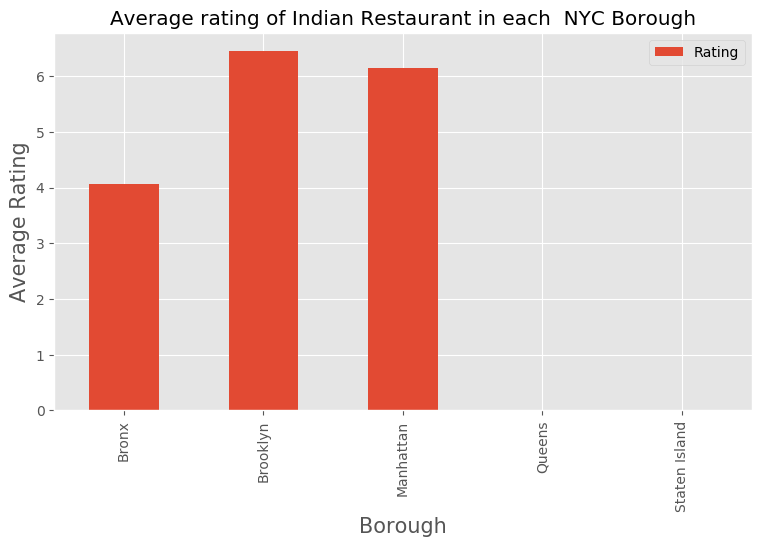

In [32]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Average rating of Indian Restaurant in each  NYC Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
indian_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

Note that **Brooklyn has the highest average rating for Indian Restaurants (6.45)** followed by Manhattan (6.16) and Bronx (4.06).

Now let's explore and visualize all the neighborhoods with average rating greater or equal 8.0 in a map.

In [33]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.0]
ny_neighborhood_stats

,Neighborhood,Average Rating
6,Boerum Hill,8.00
11,Central Harlem,8.15
12,Chelsea,8.70
14,Clinton Hill,8.35
18,East Flatbush,8.00
25,Fort Greene,8.80
40,Manhattan Valley,8.20
42,Morningside Heights,8.20
45,Ocean Hill,8.10
54,Roosevelt Island,8.30


In [34]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,new_york_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Borough,Neighborhood,Latitude,Longitude,Average Rating
11,Manhattan,Tribeca,40.721522,-74.010683,9.00
6,Brooklyn,Fort Greene,40.688527,-73.972906,8.80
2,Manhattan,Chelsea,40.744035,-74.003116,8.70
3,Staten Island,Chelsea,40.594726,-74.189560,8.70
14,Manhattan,West Village,40.734434,-74.006180,8.70
12,Manhattan,Upper West Side,40.787658,-73.977059,8.50
16,Manhattan,Yorkville,40.775930,-73.947118,8.40
4,Brooklyn,Clinton Hill,40.693229,-73.967843,8.35
10,Manhattan,Roosevelt Island,40.762160,-73.949168,8.30
8,Manhattan,Morningside Heights,40.808000,-73.963896,8.20


In [35]:
# create map and display it
ny_map = folium.Map(location=(40.693943, -73.985880), zoom_start=12)

In [36]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [37]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'

#### Let's now plot the map for best neighbourhoods in New York City (NYC) that has highest average rating for Indian Restaurants

In [38]:
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)

## Results and Discussion <a name="results"></a>

Based on the population and demographic data we identified that Queens is the most populous area in New York City (NYC) along with highest Asian ethnic population followed by Manhattan.

After analyzing restaurants data, there are a total of 306 different Neighborhoods in New York City (NYC) which can be explored to open the restaurant. Among those Queens is the most densely populated borough in New York City (NYC) with more than 80 neighborhoods followed by Brooklyn, Staten Island, Bronx and Manhattan. After focusing on Indian cuisine and restaurant we identified that there are total 138 different neighborhoods out of 306 total neighborhoods in New York City (NYC) which currently contains Indian restaurant. Looking into further details we could find that Queens has the highest number of Indian Restaurants with more than 70 restaurants followed by Manhattan, Brooklyn, Bronx and Staten Island. By drilling down to neighborhood level we identified that Floral Park in Queens has the most Indian Resturants with a total count of 11 followed by Woodside, Gramercy.

Based on the tips, ratings and likes data for all 138 Indian Restaurants we identified Tribeca neighborhood under Manhattan borough has maximum likes as well as highest average ratings of the restaurants serving Indian cuisine whereas Gramercy neighborhood under Queens borough has highest number of tips. We have also seen that Tribeca, Fort Greene, Chelsea and West Village are the top neighborhoods with highest average ratings whereas Brooklyn and Manhattan are top boroughs in that list. We could also see that Bronx is the lowest rated among New York City (NYC) borough for Indian restaurants.

It is important to note that it's entirely possible that there is a very good reason for small number of restaurants in any of those areas, reasons which would make them unsuitable for a new restaurant regardless of lack of competition in the area. On the other hand considering neighborhood with highest average rating may impose bigger competition to sustain and maintain among the competitiors in the same nrighborhood. Recommended neighborhoods should therefore be considered only as a starting point for more detailed analysis which could eventually result in location which has not only no nearby competition but also other factors taken into account and all other relevant conditions met.

## Conclusion <a name="conclusion"></a>

Based on the Data Analysis and Visualization we can come to a better understanding of the interests we had earlier to be discovered which are specified as follows:

* Queens and Manhattan boroughs are most populous along with Asian ethnic population
* Tribeca (Manhattan), West Village (Manhattan) and Gramercy (Queens) are some of the best neighborhoods for Indian cuisine
* Bronx and Staten Island are ranks last in the average ratings of Indian restaurant, therefore not suitable to start with
* Manhattan and Queens borough has the best potential in the Indian restaurant market based on the population, Asian community and average Indian restaurant rating
* Manhattan also has a population density of 27,826 people per square km, highest of any borough in the United States which makes her to be a potential and long term sustainable market

Final decission on optimal restaurant neighborhood will be made by stakeholders based on specific characteristics of neighborhoods and nearby locations in every recommended borough taking into consideration additional factors like attractiveness of each location, ammenities, social and economic dynamics of every neighborhood etc.